<h1>DAO2702 Group 'TALANE' Project</h1>

<h2>Problem Statement</h2>
TIA expects its demand to return to pre-pandemic levels in Q42022, as we approach the holiday season. The TIA management sees the recovery in demand as an opportunity for TIA to rebrand itself and make a push to be Singapore’s best airline company. More specifically, management wants to find out what sets TIA apart from their main competitor, SIA and how to bridge that gap. In order to narrow the gap, management wants to start by changing customers’ perceptions that TIA is a ‘budget airline’. To do so, TIA wants to investigate customers' satisfaction scores, what the main contributors to satisfaction are, and how to most effectively increase satisfaction. 

In April 2022, TIA management gave the sales team 6 months and a $ x million budget to prepare for this recovery in demand for air travel. Management wants the sales team to come up with ideas on how to boost customers’ satisfaction scores in hopes that more satisfied customers will help to dissolve the notion that TIA is a ‘budget airline’. 

<h3>Objective</h3>

1.   Find the relationship between the various multiple variables and salary.


<h2>1. Import required libraries </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from scipy.stats import t

<h2>2. Loading and cleaning dataset</h2>

In [2]:
#Colour theme palette
turq = '#1DE4BD'

rose = '#EA7369'
rose_dark = '#C02323'

plus = turq
minus = rose

bru = '#1AC9E6'
bru_dark = '#176BA0'
pur = '#AF48CE'
pur_dark = '#7D3AC1'
prin = '#EABD3B'
ear = '#DE542C'

g_light = '#C7F9EE'
g_dark = '#1DE4BD'
r_light = '#FCEAE6'
r_dark = '#EA7369'
y_light = '#F7F4BF'
y_dark = '#EABD38'

colours = [turq,rose,bru,pur,prin,ear]
#pie_colours = [bru,bru_dark,rose_dark,rose,pur_dark,pur]
pie_colours = [g_light,g_dark,r_dark,r_light,y_dark,y_light]

In [3]:
#Reading Data
data = pd.read_csv('merged.csv')
data.dropna(inplace=True)

#Change string of satisfaction into a binary value, for correlation analysis
satis = data['satisfaction'].astype(str) 
data['Sat Value'] = satis == 'satisfied'
data['Sat Value'] = data['Sat Value'].astype(int)

<h2> 3. Overall trends </h2>

<h3> 3a. HeatMap of correlations </h3>

<AxesSubplot:>

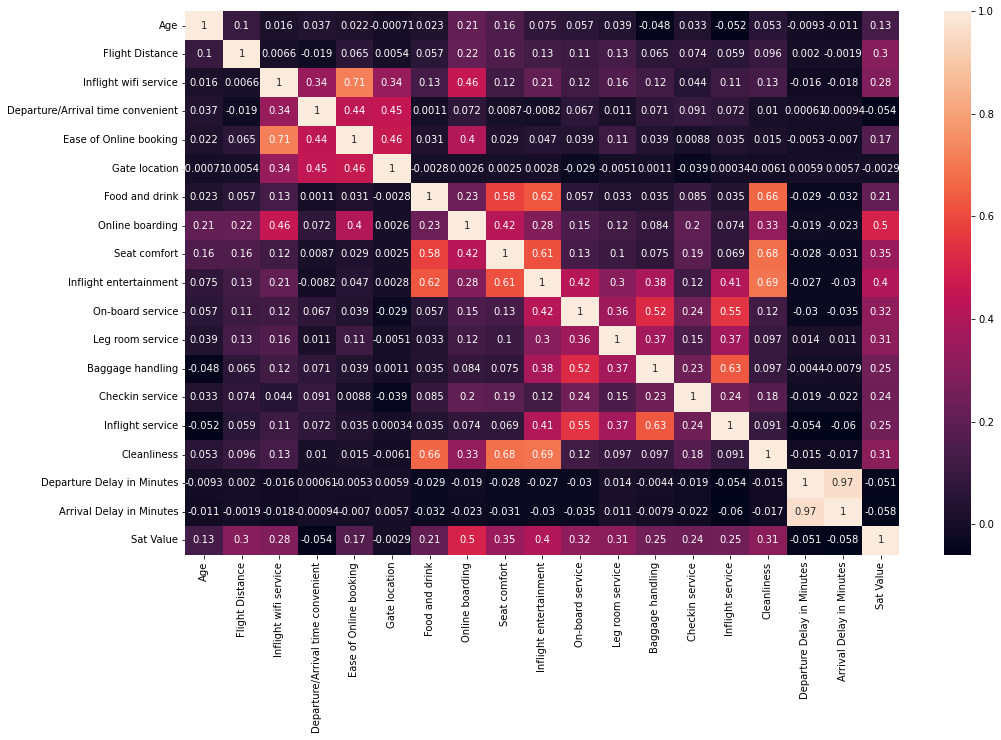

In [4]:
#Combine Numerical Data for HeatMap
a = data.loc[:,'Age']
b = data.loc[:,'Flight Distance':'Arrival Delay in Minutes']
c = data.loc[:,'Sat Value']
data1 = pd.concat([a,b,c], axis =1)

#Heatmap on correlation
plt.figure(figsize=(16,10))
sns.heatmap(data1.corr(), annot = True)

<h3> 3b. Boxplot <h3>

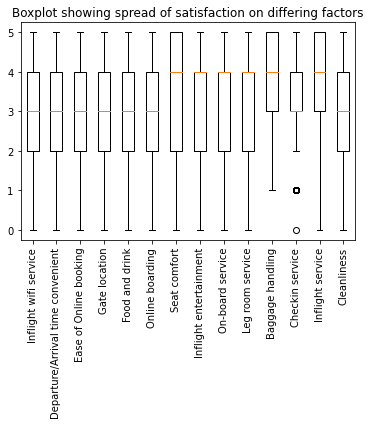

In [5]:
#Boxplot to show how ratings vary
survey_data = data.loc[:,'Inflight wifi service':'Cleanliness']
plt.boxplot(survey_data, labels = survey_data.columns)
plt.xticks(rotation = 90)
plt.title("Boxplot showing spread of satisfaction on differing factors")
plt.show()

<h2> 4. Segmenting columns needed for data analysis </h2>

In [6]:
#Initalise columns

#Labels Arrays

#Different Classes of Travel
labels_class = data['Class'].unique()

#Different Type of Travel Purpose
labels_tot = data['Type of Travel'].unique()

#Satisfaction labels
labels_satisfaction = ['Satisfied 1','Dissatisfied/Neutral 0']

#This cell defines the boolean series used for the different functions
#note that you have to define a new column for 
# the int mapping of the boolean series


isMale = (data['Gender'] == 'Male').astype(int)
data['isMale'] = isMale

isLoyal = (data['Customer Type'] == 'Loyal Customer').astype(int)
data['isLoyal'] = isLoyal

<h2> 5. Overarching view of our customer base </h2>

In [7]:
def count(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:d}".format(absolute)

def segments(col,colours,count, t):
    a = data.loc[:,col].value_counts()
    plt.pie(a,labels = np.array(a.index), autopct = lambda pct: count(pct,a), colors = colours)
    plt.title(t)


<h3> 5a. TIA current customer segmentation </h3>

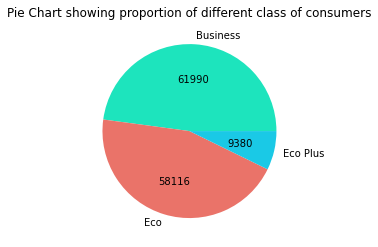

In [8]:
segments('Class',[turq,rose,bru], count, "Pie Chart showing proportion of different class of consumers")

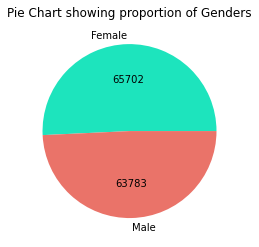

In [9]:
segments('Gender',[turq,rose],count, "Pie Chart showing proportion of Genders")

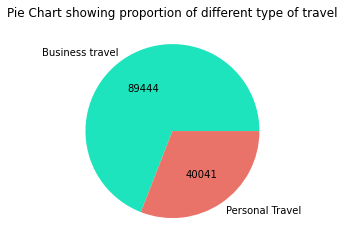

In [10]:
segments('Type of Travel',[turq,rose],count, "Pie Chart showing proportion of different type of travel")

<h3> 5b.</h3> 
<h3> Proportion of satisfied customers amongst each segment </h3>
<h3> Proportion of loyal customers amongst each segment </h3>

In [11]:
'''
Pie_prop 
-> groups, select the column-category to view
-> partition defines the way that each sub-group from groups is split
classifications defines the labels that partitions use

'''
def pie_prop(partition, groups, classifications, colours, func):
    #initialising x and y
    pie_data = []
    corres_labels = []
    

    partition = partition
    groups = groups

    for selection in data[groups].unique():
        for part in data[partition].unique():
            count = len(data.loc[data[groups] == selection].loc[data[partition] == part])
            pie_data.append(count)
            if part == 1:
                part = classifications[0]
            else:
                part = classifications[1]
            corres_labels.append(str(part) + ' within ' + selection)
    plt.pie(pie_data, labels = corres_labels, startangle = 15, colors = colours, autopct = lambda pct: func(pct, pie_data))
    plt.show()

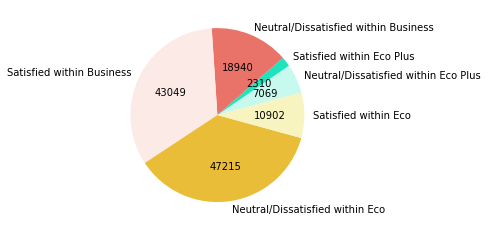

In [12]:
pie_prop('Sat Value', 'Class',['Satisfied', 'Neutral/Dissatisfied'], pie_colours, count)

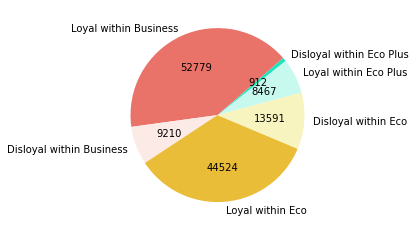

In [13]:
pie_prop('isLoyal', 'Class', ['Loyal','Disloyal'], pie_colours, count)

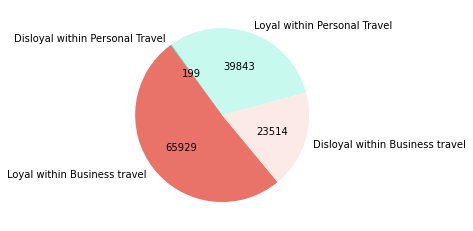

In [14]:
pie_prop('isLoyal', 'Type of Travel', ['Loyal','Disloyal'], pie_colours, count)

<h3> 5c. Proportion of satisfied customers across seat classes </h3>

<BarContainer object of 3 artists>

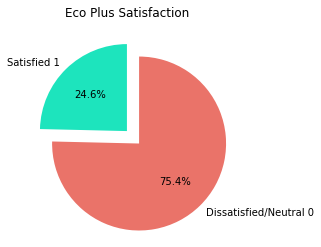

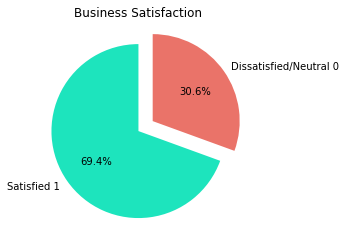

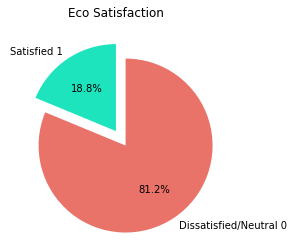

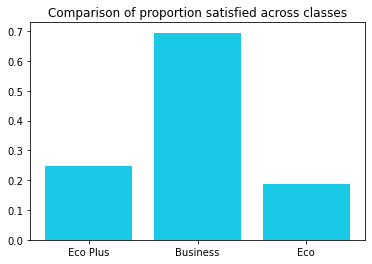

In [15]:
prop_satis_class = []
for classes in labels_class:
    
    prop = data.loc[data['Class'] == classes]['Sat Value'].mean()
    prop_satis_class.append(prop)
    arr = [prop, 1- prop]
    fig,ax1 = plt.subplots()
    ax1.pie(arr, labels = labels_satisfaction,autopct='%1.1f%%', startangle = 90, colors = [turq,rose], explode = [0,0.2])
    ax1.set_title(classes + " Satisfaction")

fig, ax2 = plt.subplots()
#ax2.pie(prop_satis_class, labels = labels_class, startangle = 90)
ax2.set_title("Comparison of proportion satisfied across classes")
ax2.bar(labels_class, prop_satis_class, color = bru)

<h3> 5d. Proportion of satisfied customers across type of travel </h3>

Text(0.5, 1.0, 'Comparison of proportion satisfied across Type Travel')

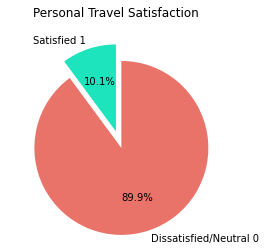

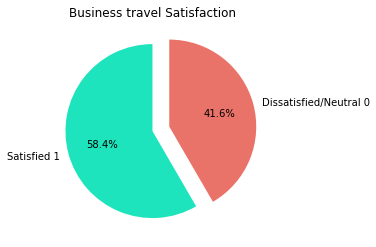

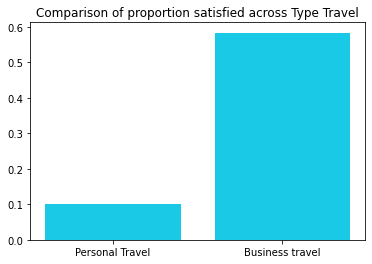

In [16]:
prop_satis_tot = []
for tot in labels_tot:
    satis_tot = data.loc[data['Type of Travel'] == tot]['Sat Value'].sum()
    prop = satis_tot / len(data.loc[data['Type of Travel'] == tot])
    prop_satis_tot.append(prop)
    arr = [prop, 1- prop]
    fig,ax1 = plt.subplots()
    ax1.pie(arr, labels = labels_satisfaction,autopct='%1.1f%%', startangle = 90, colors = [turq,rose], explode = [0,0.2])
    ax1.set_title(tot + " Satisfaction")

fig, ax2 = plt.subplots()
ax2.bar(labels_tot,prop_satis_tot, color = bru)
ax2.set_title("Comparison of proportion satisfied across Type Travel")

<h3> 5e. Stack plots showing segmentation within each specific class </h3>

In [17]:
'''
#stack_plot takes in a label array for x values, the column of categories you like to look at
# and the boolean series to check the proportion on
#e.g in labels_arr we have 'EcoPlus','Business' and 'Eco'
#'Class' is 
'''


def stack_plot(col,bool_ser):
    mean_1 = []
    mean_0 = []
    labels_arr = data[col].unique();
    
    for cat in labels_arr:
        is_cat = data[col] == cat
        data_class = data.loc[is_cat].loc[:,bool_ser] #gender column for each
        prop_1 = data_class.mean()
        mean_1.append(prop_1)
        prop_0 = 1 - prop_1
        mean_0.append(prop_0)
    
    m1 = np.array(mean_1)
    m2 = np.array(mean_0)
    
    plt.bar(labels_arr,m1,width = 0.5, label = bool_ser, color = turq)
    plt.bar(labels_arr,m2,bottom = m1,width = 0.5,label = 'NOT ' + bool_ser, color = rose)
    plt.legend()

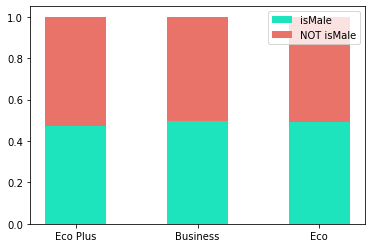

In [18]:
stack_plot('Class','isMale')


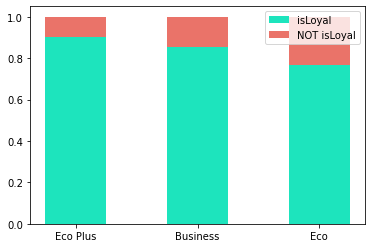

In [19]:
stack_plot('Class','isLoyal')

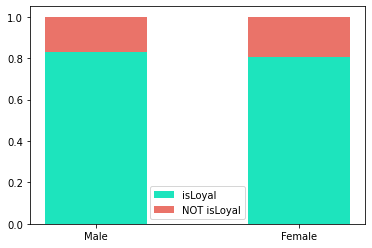

In [20]:
stack_plot('Gender','isLoyal')

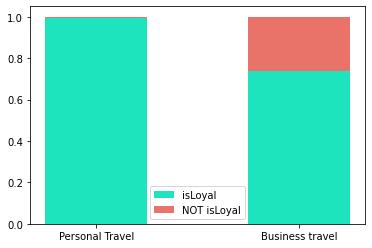

In [21]:
stack_plot('Type of Travel', 'isLoyal')

<h2> 6. Comparing average satisfaction within each variable between satisfied / netural or disatisfied customers

In [22]:
#We begin the analysis of average satisfaction values within each variable

#Boolean Series of Satisfied
satisfied = data['Sat Value'] == 1

#subset for satisfied
var_sat_satisfied = data.loc[satisfied].loc[:,'Inflight wifi service':'Inflight service']

#labels for the variables
labels_var = var_sat_satisfied.columns

#average satisfaction within that variable
mean_var_sat_satisfied = var_sat_satisfied.mean()

#Similarly, subset for neut/dissatisfied, mean 
var_sat_taksatisfied = data.loc[~satisfied].loc[:,'Inflight wifi service':'Inflight service']
mean_var_sat_taksatisfied = var_sat_taksatisfied.mean()

#Array of differences in the average
diff_arr = mean_var_sat_satisfied - mean_var_sat_taksatisfied

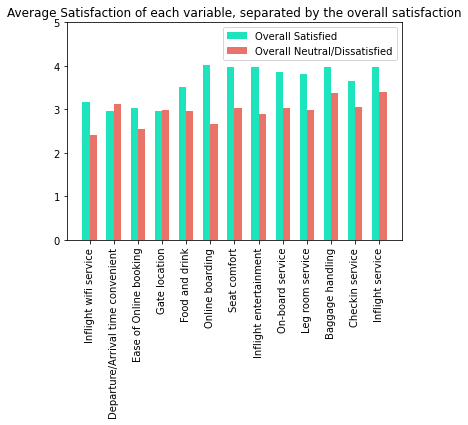

In [23]:
#Plot the ave satisfaction, per indep variable, for satisfied ppl
x = np.arange(len(labels_var))


plt.bar(x-0.15, mean_var_sat_satisfied, color = turq, width = 0.3, label ='Overall Satisfied')

#Plot the ave satisfaction, per indep variable, for neut/dissatisfied ppl
plt.bar(x+0.15, mean_var_sat_taksatisfied, color = rose, width = 0.3, label = 'Overall Neutral/Dissatisfied')

#Settings
plt.xticks(x,labels_var,rotation = 90)
plt.title('Average Satisfaction of each variable, separated by the overall satisfaction')
plt.legend()
plt.ylim(ymin = 0, ymax = 5) 
plt.show()

Text(0.5, 1.0, 'Difference in satisfactions within each variable, between those satisfied against dissatisfied ')

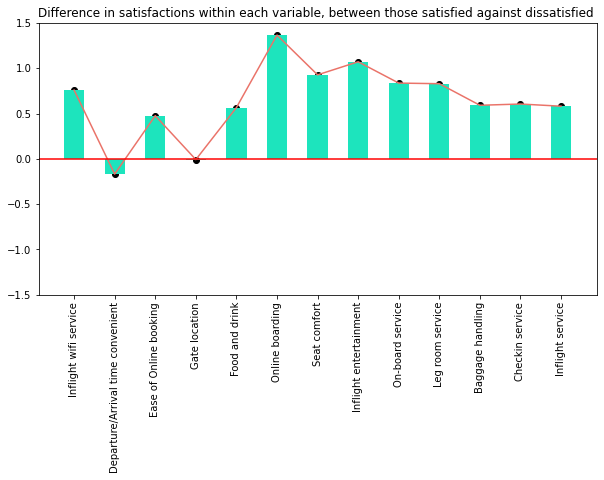

In [24]:
plt.figure(figsize = (10,5))

x = np.arange(len(labels_var))

#Various Plots
plt.bar(labels_var,diff_arr, width= 0.5, color = turq)
plt.plot(labels_var,diff_arr, color = rose)
plt.axhline(y=0, linestyle='-', color = 'r')
plt.scatter(labels_var,diff_arr, color = 'black')

#Settings
plt.xticks(x,labels_var,rotation = 90)
plt.ylim(ymin = -1.5, ymax = 1.5)
plt.title('Difference in satisfactions within each variable, between those satisfied against dissatisfied ')

<h2> 7. How does satisfaction or loyalty differ across age groups? </h2>

In [25]:
'''
#bins_arr for the xlabels, col for the column to check against
#bin_type for defining a new col to note the bins 
#e.g Age_Bin holds the bin that that row corresponds to
#wid specifies width of bar
'''

def bin_prop(bins_arr,col,bin_type,value,wid, t):

    #initialise new column e.g age bins
    data[bin_type] = 0
    
    #init new arr that holds means
    percentage = []
    
    #for each bin, we find unclassified items and classify them
    #then we find the mean of that class and append
    for upper in bins_arr:
        not_classified = data[bin_type] == 0
        binn = data[col] <= upper
        #update bin classification
        data.loc[binn & not_classified, bin_type] = upper
        isBin = data[bin_type] == upper
        #find the percentage metric of specified value e.g satisfaction rate
        mean = data.loc[isBin].loc[:,value].mean()
        
        percentage.append(data.loc[isBin].loc[:,value].mean())
    plt.xticks(bins_arr,rotation = 75)
    plt.title(t)
    plt.bar(bins_arr,np.array(percentage),width = wid, color = bru)

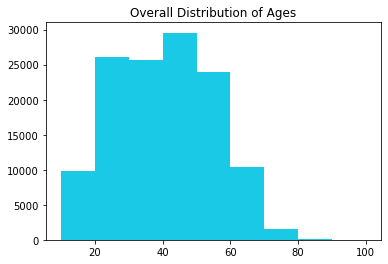

In [26]:
#overall distribution of ages
age_arr = plt.hist(data['Age'], bins = [10,20,30,40,50,60,70,80,90,100], color = bru)[1]
plt.title('Overall Distribution of Ages')
plt.show()

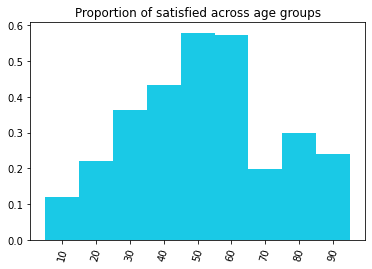

In [27]:
bin_prop(age_arr,'Age','Age_Bin','Sat Value',10,'Proportion of satisfied across age groups')

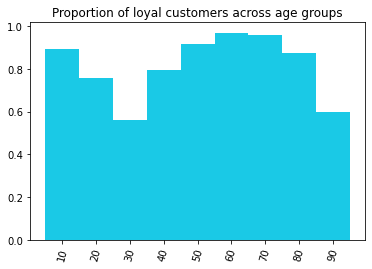

In [28]:
bin_prop(age_arr,'Age','Age_Bin','isLoyal',10, 'Proportion of loyal customers across age groups')

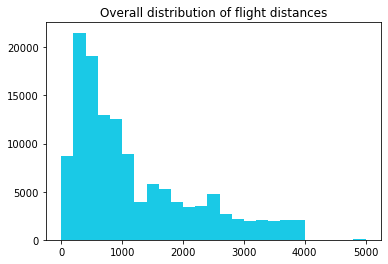

In [29]:
#Overall distribution of flight distances
dist_arr = plt.hist(data['Flight Distance'],range = (0,5000), bins = 25, color = bru)[1]
plt.title('Overall distribution of flight distances')
plt.show()

<h2> 8. How does satisfaction or loyalty differ across flight distance? </h2> 

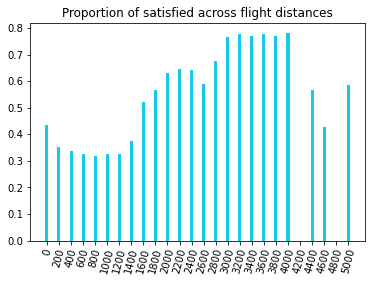

In [30]:
bin_prop(dist_arr,'Flight Distance','Dist_Bin','Sat Value',50, 'Proportion of satisfied across flight distances')

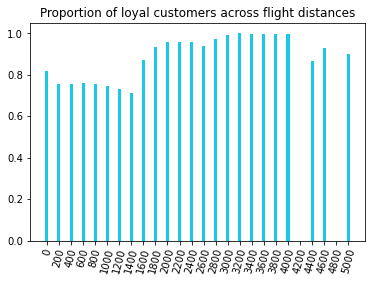

In [31]:
bin_prop(dist_arr,'Flight Distance','Dist_Bin','isLoyal',50, 'Proportion of loyal customers across flight distances')

<h2> 9. How does proportion of satisfaction change across diferrent factors? </h2>

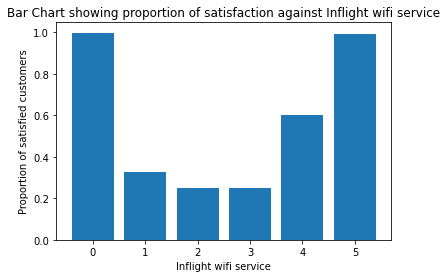

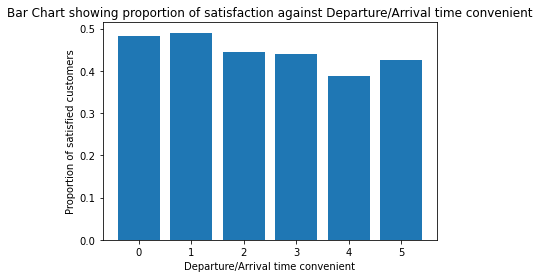

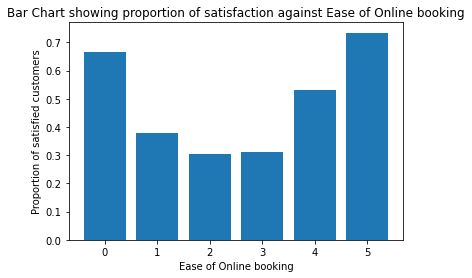

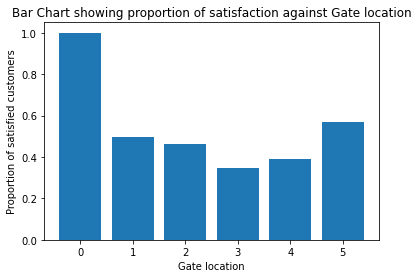

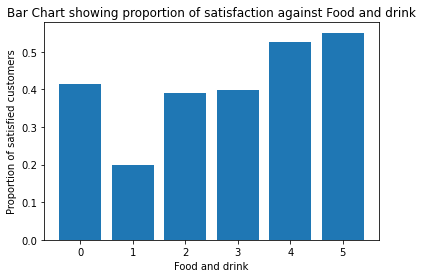

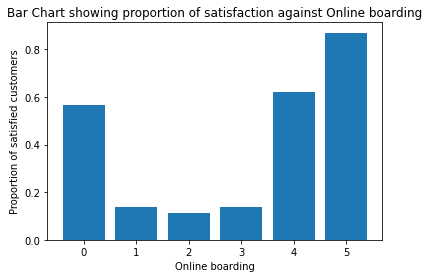

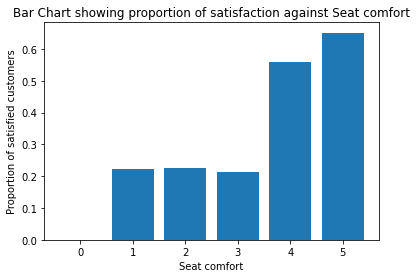

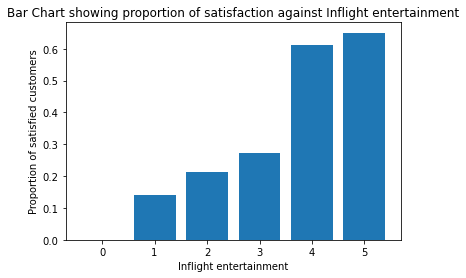

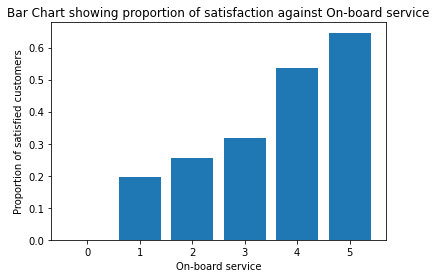

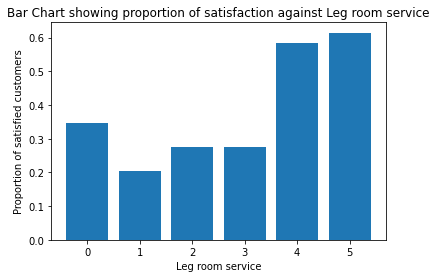

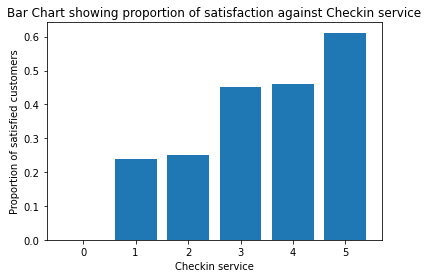

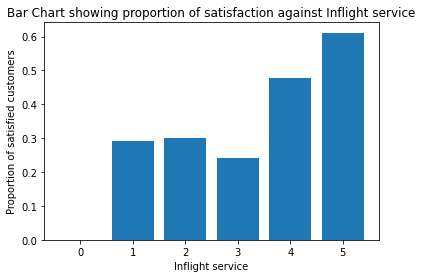

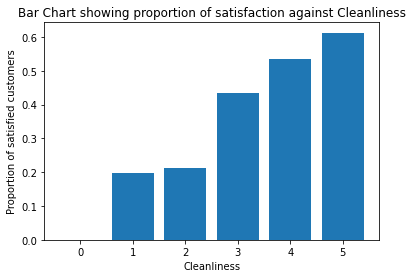

In [32]:
for column in data:
    if data[column].nunique() == 6:
        # Store proportion of satisfied customer into an array
        temp = []

        # temp[0] will consist of proportion of satisfied customer with wifi rating 0

        # There are total of 6 possible values for Wifi services [0,1...6]
        for i in range(6):

            # Num represents the number of satisfied customer for that particular wifi rating
            num = ((data[column] == i) & (data['Sat Value'])).sum()

            # Denom represents the total number of customers for that particular wifi rating
            denom = (data[column] == i).sum()
            prop = num / denom
            temp.append(prop)
            
        # Plot bar graph
        x = [i for i in range(6)]
        y = temp
        plt.xlabel(column)                     
        plt.ylabel('Proportion of satisfied customers')
        plt.title(f"Bar Chart showing proportion of satisfaction against {column}")
        plt.bar(x,y)
        plt.show()

<h2> 10. What is the correlation coefficient between different segments and satisfaction rates? </h2>

In [33]:
def corr_bar_graph_generator(x_segment, improvement, col):
    y_axis_values = []
    x_axis_labels = []

    labels_class = data[x_segment].unique()
    
    for classes in labels_class:
        prop = data.loc[data[x_segment] == classes, [x_segment,'Sat Value', improvement]]
        corr_arr = []
        for i in range(1, 6):
            temp = prop.loc[prop[improvement] == i, ['Sat Value']]

            corr_arr.append(temp['Sat Value'].mean() * 100)
        x_axis_labels.append(classes)
        y_axis_values.append(pearsonr([i for i in range(1, 6)], corr_arr)[0])
    plt.title("Correlation of " + improvement + " on satisfaction rate for different " + x_segment)
    plt.ylabel("Correlation coefficient")
    plt.xlabel(x_segment)
    plt.bar(x_axis_labels, y_axis_values, color=col)
    plt.show()

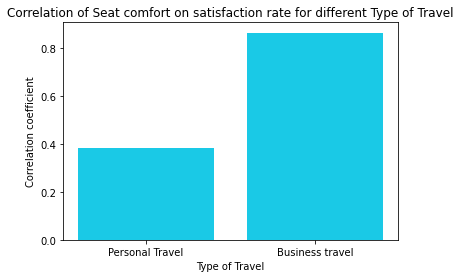

In [34]:
corr_bar_graph_generator('Type of Travel', 'Seat comfort', bru)

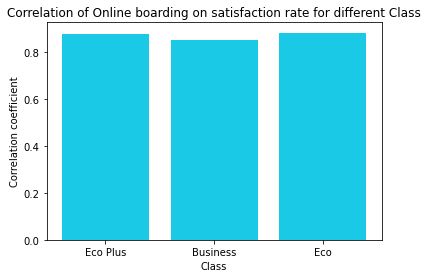

In [35]:
corr_bar_graph_generator('Class', 'Online boarding', bru)

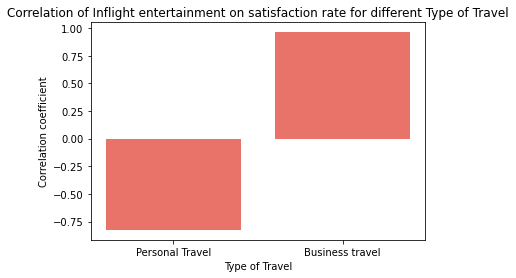

In [36]:
corr_bar_graph_generator('Type of Travel', 'Inflight entertainment', rose)

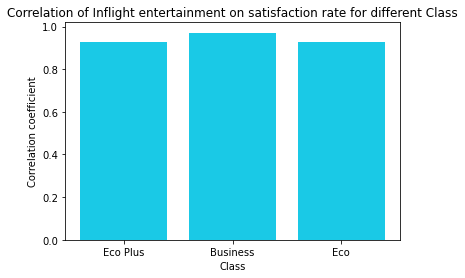

In [37]:
corr_bar_graph_generator('Class', 'Inflight entertainment', bru)

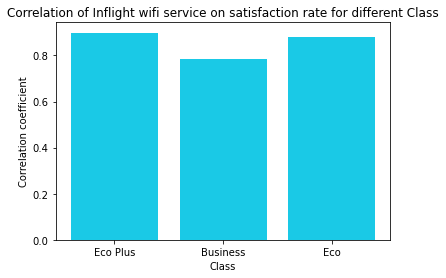

In [38]:
corr_bar_graph_generator('Class', 'Inflight wifi service', bru)

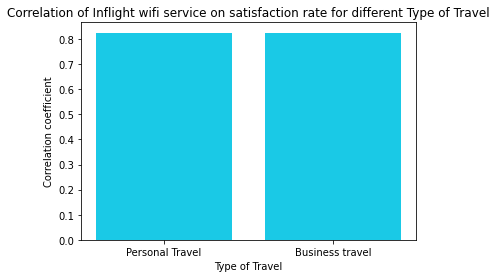

In [39]:
corr_bar_graph_generator('Type of Travel', 'Inflight wifi service', bru)

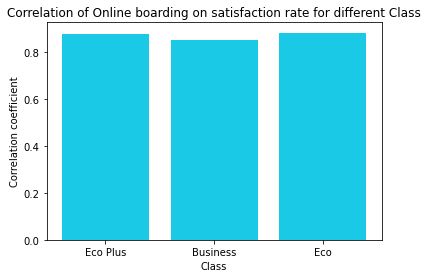

In [40]:
corr_bar_graph_generator('Class', 'Online boarding', bru)

<h2> 11. Some additional data </h2>

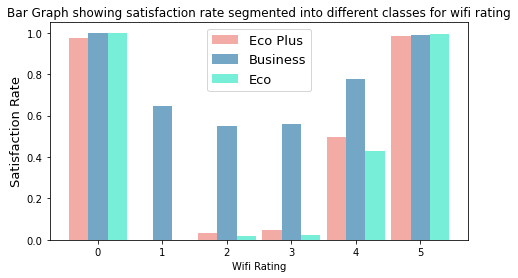

In [41]:
prop_satis_eco_plus = []
prop = data.loc[data['Class'] == 'Eco Plus', ['Class','Sat Value', 'Inflight wifi service']]
for i in range(6):
    prop_satis_eco_plus.append(prop.loc[prop['Inflight wifi service'] == i]['Sat Value'].mean())

prop_satis_biz = []
prop = data.loc[data['Class'] == 'Business', ['Class','Sat Value', 'Inflight wifi service']]
for i in range(6):
    prop_satis_biz.append(prop.loc[prop['Inflight wifi service'] == i]['Sat Value'].mean())
    
prop_satis_eco = []
prop = data.loc[data['Class'] == 'Eco', ['Class','Sat Value', 'Inflight wifi service']]
for i in range(6):
    prop_satis_eco.append(prop.loc[prop['Inflight wifi service'] == i]['Sat Value'].mean())
    
x = np.arange(6)                 # An array 0, 1, 2, ..., 4
width = 0.3                                 # Width of the bar

plt.figure(figsize=(7.5, 4))
plt.bar(x-width, prop_satis_eco_plus, 
        color=rose, width=width, alpha=0.6,
        label='Eco Plus')                     # Bar chart for paper1
plt.bar(x, prop_satis_biz, 
        color=bru_dark, width=width, alpha=0.6,
        label='Business')                     # Bar chart for paper2

plt.bar(x+width, prop_satis_eco, 
        color= turq, width=width, alpha=0.6,
        label='Eco')                     # Bar chart for paper2

plt.legend(fontsize=13)
plt.title('Bar Graph showing satisfaction rate segmented into different classes for wifi rating')
plt.xlabel('Wifi Rating')
plt.ylabel('Satisfaction Rate', fontsize=13)
plt.show()


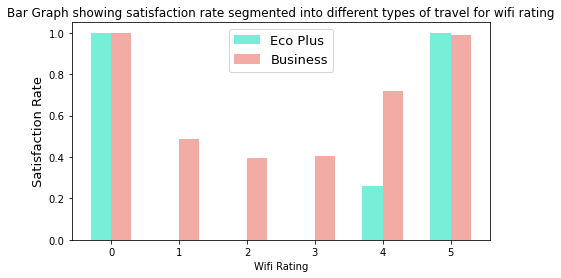

In [42]:
prop_satis_personal_travel = []
prop = data.loc[data['Type of Travel'] == 'Personal Travel', ['Class','Sat Value', 'Inflight wifi service']]
for i in range(6):
    prop_satis_personal_travel.append(prop.loc[prop['Inflight wifi service'] == i]['Sat Value'].mean())

prop_satis_biz = []
prop = data.loc[data['Type of Travel'] == 'Business travel', ['Class','Sat Value', 'Inflight wifi service']]
for i in range(6):
    prop_satis_biz.append(prop.loc[prop['Inflight wifi service'] == i]['Sat Value'].mean())
    
x = np.arange(6)                 # An array 0, 1, 2, ..., 4
width = 0.3                                 # Width of the bar

plt.figure(figsize=(7.5, 4))
plt.bar(x-0.5 * width, prop_satis_personal_travel, 
        color=turq, width=width, alpha=0.6,
        label='Eco Plus')                     # Bar chart for paper1
plt.bar(x + 0.5 * width , prop_satis_biz, 
        color=rose, width=width, alpha=0.6,
        label='Business')                     # Bar chart for paper2

plt.legend(fontsize=13)
plt.title('Bar Graph showing satisfaction rate segmented into different types of travel for wifi rating')
plt.xlabel('Wifi Rating')
plt.ylabel('Satisfaction Rate', fontsize=13)
plt.show()


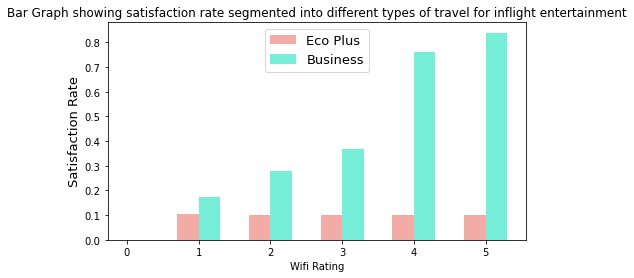

In [43]:
prop_satis_personal_travel = []
prop = data.loc[data['Type of Travel'] == 'Personal Travel', ['Class','Sat Value', 'Inflight entertainment']]
for i in range(6):
    prop_satis_personal_travel.append(prop.loc[prop['Inflight entertainment'] == i]['Sat Value'].mean())

prop_satis_biz = []
prop = data.loc[data['Type of Travel'] == 'Business travel', ['Class','Sat Value', 'Inflight entertainment']]
for i in range(6):
    prop_satis_biz.append(prop.loc[prop['Inflight entertainment'] == i]['Sat Value'].mean())
    
x = np.arange(6)                 # An array 0, 1, 2, ..., 4
width = 0.3                                 # Width of the bar

plt.figure(figsize=(7.5, 4))
plt.bar(x-0.5 * width, prop_satis_personal_travel, 
        color=rose, width=width, alpha=0.6,
        label='Eco Plus')                     # Bar chart for paper1
plt.bar(x + 0.5 * width , prop_satis_biz, 
        color=turq, width=width, alpha=0.6,
        label='Business')                     # Bar chart for paper2

plt.legend(fontsize=13)
plt.title('Bar Graph showing satisfaction rate segmented into different types of travel for inflight entertainment')
plt.xlabel('Wifi Rating')
plt.ylabel('Satisfaction Rate', fontsize=13)
plt.show()

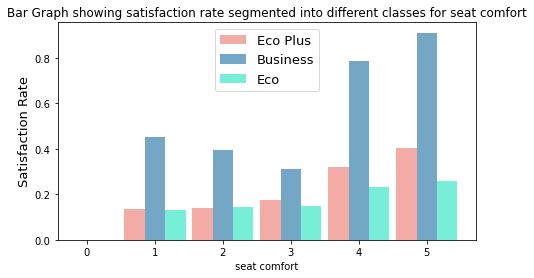

In [44]:
prop_satis_eco_plus = []
prop = data.loc[data['Class'] == 'Eco Plus', ['Class','Sat Value', 'Seat comfort']]
for i in range(6):
    prop_satis_eco_plus.append(prop.loc[prop['Seat comfort'] == i]['Sat Value'].mean())

prop_satis_biz = []
prop = data.loc[data['Class'] == 'Business', ['Class','Sat Value', 'Seat comfort']]
for i in range(6):
    prop_satis_biz.append(prop.loc[prop['Seat comfort'] == i]['Sat Value'].mean())
    
prop_satis_eco = []
prop = data.loc[data['Class'] == 'Eco', ['Class','Sat Value', 'Seat comfort']]
for i in range(6):
    prop_satis_eco.append(prop.loc[prop['Seat comfort'] == i]['Sat Value'].mean())
    
x = np.arange(6)                 # An array 0, 1, 2, ..., 4
width = 0.3                                 # Width of the bar

plt.figure(figsize=(7.5, 4))
plt.bar(x-width, prop_satis_eco_plus, 
        color=rose, width=width, alpha=0.6,
        label='Eco Plus')                     # Bar chart for paper1
plt.bar(x, prop_satis_biz, 
        color=bru_dark, width=width, alpha=0.6,
        label='Business')                     # Bar chart for paper2

plt.bar(x+width, prop_satis_eco, 
        color=turq, width=width, alpha=0.6,
        label='Eco')                     # Bar chart for paper2

plt.legend(fontsize=13)
plt.title('Bar Graph showing satisfaction rate segmented into different classes for seat comfort')
plt.xlabel('seat comfort')
plt.ylabel('Satisfaction Rate', fontsize=13)
plt.show()

## Regression Analysis


#### Preparing the columns for the ols function

In [45]:
def under(string):
    return string.replace(" ","_").replace("-","_").replace("/","_").lower()

In [46]:
data.rename(under, axis = 'columns', inplace = True)

In [47]:
arr = data.columns[8:22]
string = ' + '.join(arr)
print(string)

inflight_wifi_service + departure_arrival_time_convenient + ease_of_online_booking + gate_location + food_and_drink + online_boarding + seat_comfort + inflight_entertainment + on_board_service + leg_room_service + baggage_handling + checkin_service + inflight_service + cleanliness


### Summary

In [48]:
data_mr = smf.ols('sat_value ~ inflight_wifi_service + departure_arrival_time_convenient + ease_of_online_booking + gate_location + food_and_drink + online_boarding + seat_comfort + inflight_entertainment + on_board_service + leg_room_service + baggage_handling + checkin_service + inflight_service + cleanliness', data = data)
result_mr = data_mr.fit()
print(result_mr.summary())

                            OLS Regression Results                            
Dep. Variable:              sat_value   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6039.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:22:50   Log-Likelihood:                -60318.
No. Observations:              129487   AIC:                         1.207e+05
Df Residuals:                  129472   BIC:                         1.208e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [49]:
beta = result_mr.params
se = result_mr.bse
df = 129475
alpha = 0.05

moe = se * t.ppf(1-alpha/2, df)
lower = beta - moe
upper = beta + moe
print(lower)
print(upper)

Intercept                           -0.714544
inflight_wifi_service                0.035072
departure_arrival_time_convenient   -0.046537
ease_of_online_booking              -0.017763
gate_location                        0.017705
food_and_drink                      -0.016230
online_boarding                      0.131975
seat_comfort                         0.022106
inflight_entertainment               0.045509
on_board_service                     0.040990
leg_room_service                     0.053022
baggage_handling                     0.007594
checkin_service                      0.032449
inflight_service                     0.001193
cleanliness                          0.004494
dtype: float64
Intercept                           -0.690837
inflight_wifi_service                0.039900
departure_arrival_time_convenient   -0.043246
ease_of_online_booking              -0.012903
gate_location                        0.021708
food_and_drink                      -0.011590
online_boarding    